# An End-to-End Data Cleaning Project on the UN Data with Python


### Data source: https://www.un.org/en/development/desa/population/migration/data/estimates2/estimates15.asp 

Data cleaning is a part of work consumes about 80% of time of data scientists. To cleaning data, 


# 1. Read a created CSV file

First, read the dataset after downloading the file. In here, the file is uploaded on my gibhub page to give an access for the purpose of rerunning the code in the future.  

In [53]:
# import any necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

mst_df = pd.read_csv('https://raw.githubusercontent.com/jeehobdata/projects/master/Data/UN_MigrantStockTotal_2015.csv')
mst_df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Trends in International Migrant Stock: The 201...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,Table 1 - International migrant stock at mid-...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,POP/DB/MIG/Stock/Rev.2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, it shows number of null values in various columns, since because the dataset is organized in Microsoft Excel format, it needs to be cleaned to be used in python environment.

# 2. Tidy and transform the data

Within the table of data, the values are categorized in three sections: International migrant stock at mid-year (both sexes), International migrant stock at mid-year (male), International migrant stock at mid-year (female). Due to the duplicated year columns by the categories of gender, the process of cleaning and transforming the dataset is required prior to analyzing it.  

## 2.1 Clean the data

To begin with, let's clean the dataset by setting the important parts of the data, replacing the null values, and resetting the indices. 

In [3]:
#cut out unnecessaty parts of the table
mst_df = mst_df[mst_df.columns[1:23]].iloc[13:281]
mst_df = pd.DataFrame(mst_df)

#Set the first column as the headers
mst_df.columns = mst_df.iloc[0]
mst_df = mst_df.reindex(mst_df.index.drop(13))
mst_df.head()

13,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock at mid-year (both sexes),nan,nan,nan,nan,nan,...,nan,nan,nan,nan,International migrant stock at mid-year (female),nan,nan,nan,nan,nan
14,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010,2015,...,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
15,WORLD,NaN,900,NaN,152 563 212,160 801 752,172 703 309,191 269 100,221 714 243,243 700 236,...,87 884 839,97 866 674,114 613 714,126 115 435,74 815 702,79 064 275,84 818 470,93 402 426,107 100 529,117 584 801
16,Developed regions,(b),901,NaN,82 378 628,92 306 854,103 375 363,117 181 109,132 560 325,140 481 955,...,50 536 796,57 217 777,64 081 077,67 618 619,42 115 231,47 214 055,52 838 567,59 963 332,68 479 248,72 863 336
17,Developing regions,(c),902,NaN,70 184 584,68 494 898,69 327 946,74 087 991,89 153 918,103 218 281,...,37 348 043,40 648 897,50 532 637,58 496 816,32 700 471,31 850 220,31 979 903,33 439 094,38 621 281,44 721 465
18,Least developed countries,(d),941,NaN,11 075 966,11 711 703,10 077 824,9 809 634,10 018 128,11 951 316,...,5 361 902,5 383 009,5 462 714,6 463 217,5 236 216,5 573 685,4 721 920,4 432 371,4 560 536,5 493 028


Now, let's drop the unnecessary columns: _Notes_ and _Type of data(a)_.

In [4]:
#Drop the Notes column and Type of Data(a) column
mst_df = mst_df.drop(['Notes', 'Country code', 'Type of data (a)'], axis=1)

#Set a new index on the cleaned dataframe
mst_index = pd.Series(range(266)) 
mst_df = mst_df.set_index([mst_index])
mst_df.head()

13,"Major area, region, country or area of destination",International migrant stock at mid-year (both sexes),nan,nan,nan,nan,nan,International migrant stock at mid-year (male),nan,nan,nan,nan,nan,International migrant stock at mid-year (female),nan,nan,nan,nan,nan
0,NaN,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,WORLD,152 563 212,160 801 752,172 703 309,191 269 100,221 714 243,243 700 236,77 747 510,81 737 477,87 884 839,97 866 674,114 613 714,126 115 435,74 815 702,79 064 275,84 818 470,93 402 426,107 100 529,117 584 801
2,Developed regions,82 378 628,92 306 854,103 375 363,117 181 109,132 560 325,140 481 955,40 263 397,45 092 799,50 536 796,57 217 777,64 081 077,67 618 619,42 115 231,47 214 055,52 838 567,59 963 332,68 479 248,72 863 336
3,Developing regions,70 184 584,68 494 898,69 327 946,74 087 991,89 153 918,103 218 281,37 484 113,36 644 678,37 348 043,40 648 897,50 532 637,58 496 816,32 700 471,31 850 220,31 979 903,33 439 094,38 621 281,44 721 465
4,Least developed countries,11 075 966,11 711 703,10 077 824,9 809 634,10 018 128,11 951 316,5 843 107,6 142 712,5 361 902,5 383 009,5 462 714,6 463 217,5 236 216,5 573 685,4 721 920,4 432 371,4 560 536,5 493 028


It looks much readable than the very first table. Now, since the dataset includes the information of migrants in three different categories as male, female, and both sexes, it needs to be reorganized to categorize the genders, the years, and also the countries. To do that, we should create three dataframes by the genders, and then tidy and merge them. 

## 2.2 Create three dataframes by the genders

Let's now create three dataframes of the categories of the genders. To create the three dataframes, we need to label the all columns based on the categories.  

In [16]:
# Create a copied dataset of the creaned dataset 
mst_df1 = mst_df

# Label the each columns
mst_df1.columns=['Destination',
                 'Both sexes','Both sexes','Both sexes','Both sexes','Both sexes','Both sexes',
                 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
                 'Female', 'Female', 'Female', 'Female', 'Female', 'Female']

# Replace the null value with 'Destination'
mst_df1["Destination"] = mst_df1["Destination"].fillna("Destination")
mst_df1.head()

,Destination,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Male,Male,Male,Male,Male,Male,Female,Female,Female,Female,Female,Female
0,Destination,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,WORLD,152 563 212,160 801 752,172 703 309,191 269 100,221 714 243,243 700 236,77 747 510,81 737 477,87 884 839,97 866 674,114 613 714,126 115 435,74 815 702,79 064 275,84 818 470,93 402 426,107 100 529,117 584 801
2,Developed regions,82 378 628,92 306 854,103 375 363,117 181 109,132 560 325,140 481 955,40 263 397,45 092 799,50 536 796,57 217 777,64 081 077,67 618 619,42 115 231,47 214 055,52 838 567,59 963 332,68 479 248,72 863 336
3,Developing regions,70 184 584,68 494 898,69 327 946,74 087 991,89 153 918,103 218 281,37 484 113,36 644 678,37 348 043,40 648 897,50 532 637,58 496 816,32 700 471,31 850 220,31 979 903,33 439 094,38 621 281,44 721 465
4,Least developed countries,11 075 966,11 711 703,10 077 824,9 809 634,10 018 128,11 951 316,5 843 107,6 142 712,5 361 902,5 383 009,5 462 714,6 463 217,5 236 216,5 573 685,4 721 920,4 432 371,4 560 536,5 493 028


The data shows which columns is for which gender. However, the year is still duplicated three times by the genders. Now. let's create dataframes for each of the gender categories.

### 2.2.a Create a dataframe of both sexes

In [17]:
#Create a table of the columns of both sexes
mst_bothsexes = mst_df1[['Destination', 'Both sexes']]

# Add a new column with a label, 'Gender' 
# and fill the values with 'Both sexes' to categorize them later when we merge it with the other created dataframes
mst_bothsexes['Gender'] = 'Both sexes'

# Replace the value on the Gender column on the first row to reindex the table by the first row
mst_bothsexes.iloc[0,7] ='Gender'

# Set the first column as the headers
mst_bothsexes.columns = mst_bothsexes.iloc[0]
mst_bothsexes = mst_bothsexes.reindex(mst_bothsexes.index.drop(0))

# Reorder the columns
mst_bothsexes = mst_bothsexes[['Gender','Destination', '1990','1995','2000','2005','2010','2015']]
mst_bothsexes.head()

C:\Users\Jeeho\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jeeho\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Jeeho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Gender,Destination,1990,1995,2000,2005,2010,2015
1,Both sexes,WORLD,152 563 212,160 801 752,172 703 309,191 269 100,221 714 243,243 700 236
2,Both sexes,Developed regions,82 378 628,92 306 854,103 375 363,117 181 109,132 560 325,140 481 955
3,Both sexes,Developing regions,70 184 584,68 494 898,69 327 946,74 087 991,89 153 918,103 218 281
4,Both sexes,Least developed countries,11 075 966,11 711 703,10 077 824,9 809 634,10 018 128,11 951 316
5,Both sexes,Less developed regions excluding least develop...,59 105 261,56 778 501,59 244 124,64 272 611,79 130 668,91 262 036


The created table looks nice. Let's work on the other two gender dataframes.

### 2.2.b Create a dataframe of male

In [18]:
#Create a table of data of the columns of Male
mst_male = mst_df1[['Destination', 'Male']]

# Add a new column with a label, 'Gender' 
# and fill the values with 'Male' 
mst_male['Gender'] = 'Male'

# Replace the value on the Gender column on the first row to reindex the table by the first row
mst_male.iloc[0,7] ='Gender'

#Set the first column as the headers
mst_male.columns = mst_male.iloc[0]
mst_male = mst_male.reindex(mst_male.index.drop(0))

#Reorder the columns
mst_male = mst_male[['Gender','Destination', '1990','1995','2000','2005','2010','2015']]
mst_male.head()

C:\Users\Jeeho\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jeeho\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Jeeho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Gender,Destination,1990,1995,2000,2005,2010,2015
1,Male,WORLD,77 747 510,81 737 477,87 884 839,97 866 674,114 613 714,126 115 435
2,Male,Developed regions,40 263 397,45 092 799,50 536 796,57 217 777,64 081 077,67 618 619
3,Male,Developing regions,37 484 113,36 644 678,37 348 043,40 648 897,50 532 637,58 496 816
4,Male,Least developed countries,5 843 107,6 142 712,5 361 902,5 383 009,5 462 714,6 463 217
5,Male,Less developed regions excluding least develop...,31 641 006,30 501 966,31 986 141,35 265 888,45 069 923,52 033 599


### 2.2.c Create a dataframe of female

In [19]:
#Create a table of data of the columns of remale
mst_female = mst_df1[['Destination', 'Female']]

# Add a new column with a label, 'Gender' 
# and fill the values with 'Female' 
mst_female['Gender'] = 'Female'

# Replace the value on the Gender column on the first row to reindex the table by the first row
mst_female.iloc[0,7] ='Gender'

#Set the first column as the headers
mst_female.columns = mst_female.iloc[0]
mst_female = mst_female.reindex(mst_female.index.drop(0))

#Reorder the columns
mst_female = mst_female[['Gender','Destination', '1990','1995','2000','2005','2010','2015']]
mst_female.head()

C:\Users\Jeeho\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jeeho\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Jeeho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Gender,Destination,1990,1995,2000,2005,2010,2015
1,Female,WORLD,74 815 702,79 064 275,84 818 470,93 402 426,107 100 529,117 584 801
2,Female,Developed regions,42 115 231,47 214 055,52 838 567,59 963 332,68 479 248,72 863 336
3,Female,Developing regions,32 700 471,31 850 220,31 979 903,33 439 094,38 621 281,44 721 465
4,Female,Least developed countries,5 236 216,5 573 685,4 721 920,4 432 371,4 560 536,5 493 028
5,Female,Less developed regions excluding least develop...,27 464 255,26 276 535,27 257 983,29 006 723,34 060 745,39 228 437


## 2.3 Tidy and Merge the dataframes


### 2.3.a Convert  the format of dataframes into a long format 
We now have three dataframes for each of the gender categories. Let's merge those tables. To merge the table in better shape in the purpose of the future usage of analysis, it is better to be in long format based on the year. So, we will convert the format of data frames into a long format first.

In [20]:
# Set index
mst_bothsexes.set_index(['Gender','Destination'], inplace=True)
mst_bothsexes.columns.names = ['Year']

# convert the dataframes into a long format
mst_both_l = mst_bothsexes.stack().to_frame()

# Name the column
mst_both_l.columns = ['Total']

# Remove the empty spaces between numbers by applying regular expression 
mst_both_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')


mst_both_l.head(10)

Total
Gender     Destination       Year           
Both sexes WORLD             1990  152563212
                             1995  160801752
                             2000  172703309
                             2005  191269100
                             2010  221714243
                             2015  243700236
           Developed regions 1990   82378628
                             1995   92306854
                             2000  103375363
                             2005  117181109

In [21]:
# Set index
mst_male.set_index(['Gender','Destination'], inplace=True)
mst_male.columns.names = ['Year']

# convert the dataframes into a long format
mst_male_l = mst_male.stack().to_frame()

# Name the column
mst_male_l.columns = ['Total']

# Remove the empty spaces between numbers by applying regular expression 
mst_male_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

mst_male_l.head(10)

Total
Gender Destination       Year           
Male   WORLD             1990   77747510
                         1995   81737477
                         2000   87884839
                         2005   97866674
                         2010  114613714
                         2015  126115435
       Developed regions 1990   40263397
                         1995   45092799
                         2000   50536796
                         2005   57217777

In [22]:
# Set index
mst_female.set_index(['Gender','Destination'], inplace=True)
mst_female.columns.names = ['Year']


# convert the dataframes into a long format
mst_female_l = mst_female.stack().to_frame()

# Name the column
mst_female_l.columns = ['Total']

# Remove the empty spaces between numbers by applying regular expression 
mst_female_l.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

mst_female_l.head(10)


Total
Gender Destination       Year           
Female WORLD             1990   74815702
                         1995   79064275
                         2000   84818470
                         2005   93402426
                         2010  107100529
                         2015  117584801
       Developed regions 1990   42115231
                         1995   47214055
                         2000   52838567
                         2005   59963332

### 2.3.b Convert data type of the Total columns

Almost there! We are about to merge the tables but, before doing that, we need to convert the data type of 'Total' culumns of the dataframes from strings into numerics. 

In [23]:
# data frame of Both sexes 
mst_both_l['Total'] = mst_both_l['Total'].apply(pd.to_numeric)

# data frame of Mmale 
mst_male_l['Total'] = mst_male_l['Total'].apply(pd.to_numeric)

# data frame of Female 
mst_female_l['Total'] = mst_female_l['Total'].apply(pd.to_numeric)

Pivot the 'gender' column of the three dataframes to merge them

In [25]:
# pivot gender column of the dataframe of Both sexes 
long_both = pd.pivot_table(mst_both_l, values='Total', index=['Destination', 'Year'], columns=['Gender'])

long_both.head()

Gender            Both sexes
Destination Year            
Afghanistan 1990     57686.0
            1995     71522.0
            2000     75917.0
            2005     87300.0
            2010    102246.0

In [26]:
# pivot gender column of the dataframe of Male  
long_male = pd.pivot_table(mst_male_l, values='Total', index=['Destination', 'Year'], columns=['Gender'])

long_male.head()

Gender               Male
Destination Year         
Afghanistan 1990  32558.0
            1995  39105.0
            2000  42848.0
            2005  49274.0
            2010  57709.0

In [27]:
# pivot gender column of the dataframe of Female  
long_female = pd.pivot_table(mst_female_l, values='Total', index=['Destination', 'Year'], columns=['Gender'])

long_female.head()

Gender             Female
Destination Year         
Afghanistan 1990  25128.0
            1995  32417.0
            2000  33069.0
            2005  38026.0
            2010  44537.0

### 2.3.c Merge the three dataframes

After tidying and transforming the dataframes, merge them into a one dataframe 

In [29]:
# Create a list of the name of dataframes 
dfs = [long_male, long_female, long_both]

# merge the dataframes by using pd.concat() function
destination_by_gen = pd.concat(dfs, axis =1)

destination_by_gen.head(20)

Gender                  Male     Female  Both sexes
Destination Year                                   
Afghanistan 1990     32558.0    25128.0     57686.0
            1995     39105.0    32417.0     71522.0
            2000     42848.0    33069.0     75917.0
            2005     49274.0    38026.0     87300.0
            2010     57709.0    44537.0    102246.0
            2015    193445.0   188920.0    382365.0
Africa      1990   8279564.0  7411059.0  15690623.0
            1995   8616931.0  7735883.0  16352814.0
            2000   7856358.0  6943948.0  14800306.0
            2005   8231437.0  6959709.0  15191146.0
            2010   9039314.0  7800700.0  16840014.0
            2015  11123423.0  9526134.0  20649557.0
Albania     1990     30579.0    35434.0     66013.0
            1995     33284.0    38070.0     71354.0
            2000     35990.0    40705.0     76695.0
            2005     32993.0    31746.0     64739.0
            2010     26901.0    25883.0     52784.0
            2015     29363.0    28253.0     57616.0
Algeria     1990    150234.0   123720.0    273954.0
            1995    143696.0   118336.0    262032.0

Finally! The merged dataframe presents the total migrants by genders, countries and the years. Let's do some quit analysis.  

## 3. Analysis 

- Questions: 
    - What is the total number of migrants by the year?
    - Where are the countries most migrants go to, by gender and by year?

### 3.1 The total number of migrants by the year

In the merged dataframe, the total number of immigrants across the world is found in the rows where the destination is WORLD. After selecting the rows and values in the column of 'Both sexes,' it shows the total number of migrants in the world  increased from 152,563,212 in 1990 to 243,700,236 in 2015. Let's create a barplot.

In [76]:
# Select the rows where Destination is WORLD
df_world = destination_by_gen.loc['WORLD']

# Select the 'Bothe sexes' column to see the total number of migrants across the world of the years.
df_world['Both sexes']

Year
1990    152563212.0
1995    160801752.0
2000    172703309.0
2005    191269100.0
2010    221714243.0
2015    243700236.0
Name: Both sexes, dtype: float64

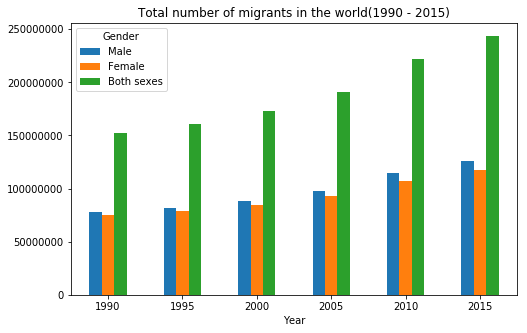

In [77]:
# Create a barplot
df_world.plot(kind='bar', figsize=(8,5), 
              title='Total number of migrants in the world(1990 - 2015)').tick_params(labelrotation=0)

plt.ticklabel_format(style='plain', axis='y')

The bar plot shows the consistently increasing number of migrants from 1990 to 2015.

### 3.2 Top destinations of migrants, by gender and by years?

In this given data, it is limited to analyze where the migrants come from because it only includes information of destination without the origin. However, explaining the migrants by gender and years is available. 

### 3.2.a Top destinations of immigrants by year

Since the list of the top destinations vary on each year, we need to create a table of data for each year. Because we need to know the list of destination countries by the total number of migrants, we can use 'Both sexes' only. To use the data, let's unstack the column because the data of the years are duplicated for the countries. 

In [31]:
# reshape the dataframe as a wide format with the value of Both sexes column
dest_year = destination_by_gen['Both sexes'].unstack()
dest_year.head()

Year,1990,1995,2000,2005,2010,2015
Destination,,,,,,
Afghanistan,57686.0,71522.0,75917.0,87300.0,102246.0,382365.0
Africa,15690623.0,16352814.0,14800306.0,15191146.0,16840014.0,20649557.0
Albania,66013.0,71354.0,76695.0,64739.0,52784.0,57616.0
Algeria,273954.0,262032.0,250110.0,247537.0,244964.0,242391.0
American Samoa,21283.0,23098.0,24912.0,24233.0,23555.0,23216.0


Now, we have a total number of migrants for the destination countries in each year. Let's start from the year of 1990.

In [32]:
# list the top 10 destination countries in 1990

dest_1990 = dest_year['1990']
dest_1990.nlargest(10)

Destination
WORLD                                                         152563212.0
Developed regions                                              82378628.0
Developing regions                                             70184584.0
Less developed regions excluding least developed countries     59105261.0
Europe                                                         49219200.0
Asia                                                           48142261.0
Northern America                                               27610542.0
United States of America                                       23251026.0
Eastern Europe                                                 21995312.0
Southern Asia                                                  19436343.0
Name: 1990, dtype: float64

In [33]:
# list the top 10 destination countries in 1995

dest_1995 = dest_year['1995']
dest_1995.nlargest(10) #9th USA

Destination
WORLD                                                         160801752.0
Developed regions                                              92306854.0
Developing regions                                             68494898.0
Less developed regions excluding least developed countries     56778501.0
Europe                                                         52842663.0
Asia                                                           46548225.0
Northern America                                               33341147.0
United States of America                                       28451053.0
Eastern Europe                                                 21344124.0
Western Europe                                                 18318040.0
Name: 1995, dtype: float64

In [34]:
# list the top 10 destination countries in 2000

dest_2000 = dest_year['2000']
dest_2000.nlargest(10) #9th USA

Destination
WORLD                                                         172703309.0
Developed regions                                             103375363.0
Developing regions                                             69327946.0
Less developed regions excluding least developed countries     59244124.0
Europe                                                         56271885.0
Asia                                                           49340815.0
Northern America                                               40351848.0
United States of America                                       34814053.0
Eastern Europe                                                 20428480.0
Western Europe                                                 20425378.0
Name: 2000, dtype: float64

In [35]:
# list the top 10 destination countries in 2005

dest_2005 = dest_year['2005']
dest_2005.nlargest(10) #8th USA

Destination
WORLD                                                         191269100.0
Developed regions                                             117181109.0
Developing regions                                             74087991.0
Less developed regions excluding least developed countries     64272611.0
Europe                                                         64086824.0
Asia                                                           53371224.0
Northern America                                               45363387.0
United States of America                                       39258293.0
Western Europe                                                 22776284.0
Western Asia                                                   21658647.0
Name: 2005, dtype: float64

In [36]:
# list the top 10 destination countries in 2010

dest_2010 = dest_year['2010']
dest_2010.nlargest(10) #8th USA

Destination
WORLD                                                         221714243.0
Developed regions                                             132560325.0
Developing regions                                             89153918.0
Less developed regions excluding least developed countries     79130668.0
Europe                                                         72374755.0
Asia                                                           65914319.0
Northern America                                               51220996.0
United States of America                                       44183643.0
Western Asia                                                   30601647.0
Western Europe                                                 25245315.0
Name: 2010, dtype: float64

In [37]:
# list the top 10 destination countries in 2015

dest_2015 = dest_year['2015']
dest_2015.nlargest(10) #8th USA

Destination
WORLD                                                         243700236.0
Developed regions                                             140481955.0
Developing regions                                            103218281.0
Less developed regions excluding least developed countries     91262036.0
Europe                                                         76145954.0
Asia                                                           75081125.0
Northern America                                               54488725.0
United States of America                                       46627102.0
Western Asia                                                   38119524.0
Western Europe                                                 27382470.0
Name: 2015, dtype: float64

In the results, it shows a list from the overall countries to regions to continents to individual countries. As a single nation, the United State is listed as a destination where the largest number of migrants go to from 1990 to 2015.

### 3.2.b Top 10 destinations of immigrants by gender

To find a more specific answer, let's focus on which countries are the destinations where the percentage of female migrants is bigger the male migrants on average from 1990 to 2015. To start, create a new column of the percentage of female migrants over the total number of people. 

In [39]:
# Create a column for the pecentage of female immigrants and label it as Female_percentage

destination_by_gen['Female_percentage'] = destination_by_gen['Female']/destination_by_gen['Both sexes']*100
destination_by_gen.head(10)

Gender                 Male     Female  Both sexes  Female_percentage
Destination Year                                                     
Afghanistan 1990    32558.0    25128.0     57686.0          43.559963
            1995    39105.0    32417.0     71522.0          45.324516
            2000    42848.0    33069.0     75917.0          43.559414
            2005    49274.0    38026.0     87300.0          43.557847
            2010    57709.0    44537.0    102246.0          43.558672
            2015   193445.0   188920.0    382365.0          49.408288
Africa      1990  8279564.0  7411059.0  15690623.0          47.232408
            1995  8616931.0  7735883.0  16352814.0          47.306127
            2000  7856358.0  6943948.0  14800306.0          46.917598
            2005  8231437.0  6959709.0  15191146.0          45.814246

In [40]:
# Pivot the year column with holding the value of Female_percentage 

dest_f_percentage = destination_by_gen['Female_percentage'].unstack()
dest_f_percentage.head()

Year,1990,1995,2000,2005,2010,2015
Destination,,,,,,
Afghanistan,43.559963,45.324516,43.559414,43.557847,43.558672,49.408288
Africa,47.232408,47.306127,46.917598,45.814246,46.322408,46.132389
Albania,53.677306,53.353701,53.073864,49.036902,49.035693,49.036726
Algeria,45.160866,45.160896,45.160929,45.160521,45.159697,45.158855
American Samoa,47.493305,47.887263,48.225755,48.425700,48.639355,48.750861


In [41]:
# Calculate the average of the percentage of the six years
dest_f_percentage_ave = (dest_f_percentage['1990']+dest_f_percentage['1995']+dest_f_percentage['2000']+dest_f_percentage['2005']+dest_f_percentage['2010']+dest_f_percentage['2015'])/6

# Present the top 10 countries with the largest number of the percentage
dest_f_percentage_ave.nlargest(10)

Destination
Nepal                                        67.857498
Armenia                                      59.121049
Kyrgyzstan                                   58.673119
Poland                                       58.481367
Estonia                                      58.463957
Latvia                                       58.389324
Republic of Moldova                          58.349413
The former Yugoslav Republic of Macedonia    58.313839
Ukraine                                      57.070838
Georgia                                      56.706615
dtype: float64

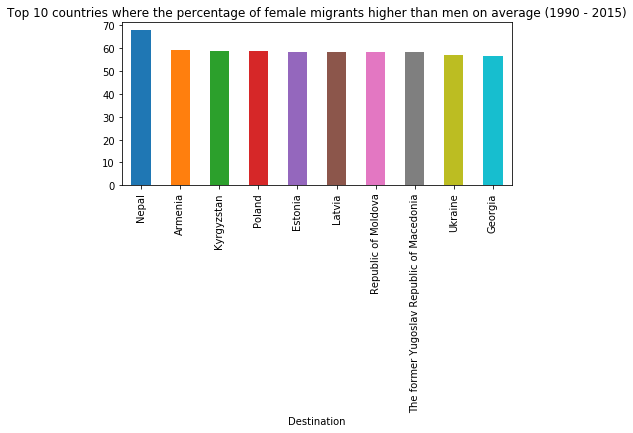

In [50]:
# Create a barplot
dest_f_percentage_ave.nlargest(10).plot(figsize=(7,3), kind='bar', 
                                        title='Top 10 countries where the percentage of female migrants higher than men on average (1990 - 2015)')

plt.ticklabel_format(style='plain', axis='y')

In [51]:
# Present the 10 destinations with the smallest average percentage of female migrant  
dest_f_percentage_ave.nsmallest(10)

Destination
Bangladesh              13.664578
Bhutan                  18.652861
Oman                    20.595325
Qatar                   22.041483
United Arab Emirates    27.149482
Bahrain                 28.997858
Greenland               31.749111
Saudi Arabia            32.117420
Kuwait                  33.767155
Libya                   34.761269
dtype: float64

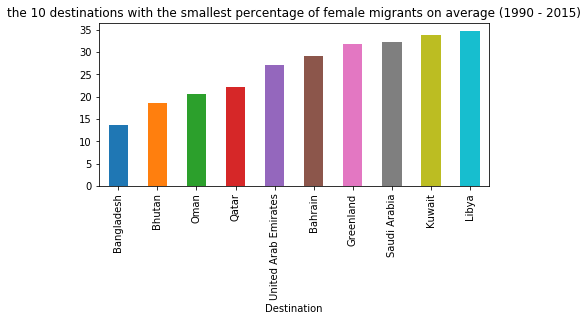

In [52]:
# Create a barplot
dest_f_percentage_ave.nsmallest(10).plot(figsize=(7,3), kind='bar', 
                                        title='the 10 destinations with the smallest percentage of female migrants on average (1990 - 2015)')

plt.ticklabel_format(style='plain', axis='y')

Interestingly, based on comparing the two created bar charts, eight out of the top ten countries with the highest average percentage of female migrants are in Europe, and the other two countries locate in Middle Asia and South Asia. Meanwhile, in the list of the ten destinations with the smallest average percentage of female migrants, six out of ten countries locate in the Middle East region, two of them in Middle Asia and one in North Africa, and one as Greenland.      

## 4. Conclusion

Data cleaning is tedious but inevitable work. Data Tidying is particularly one of the very tactical skills that can make the messy data look much readable and help the analysts to find the hidden information from the data.

